# **3. Histograms & Contrast Enhancement**
A histogram shows the frequency distribution of pixel intensities in an image.
It helps us understand brightness, contrast, and dynamic range.

Contrast enhancement techniques improve visual quality by redistributing pixel intensities.

- Histogram visualization
- Histogram Stretching (Contrast Stretching)
- Histogram equalization
- CLAHE (Contrast Limited Adaptive Histogram Equalization)

## **3.1 Histogram Visualization**

Histograms can be plotted for:

  - Grayscale image
  - Color channels (R, G, B)
  - Hue channel (from HSV)

These provide insight into brightness and color distribution.

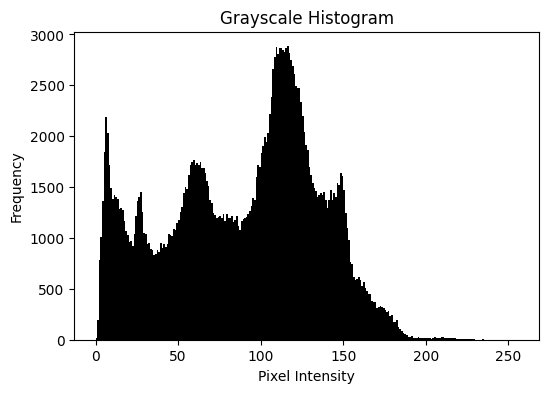

In [ ]:
# 3.1.1 Grayscale Histogram
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("fruits.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(6, 4))
plt.hist(gray.ravel(), bins=256, range=(0, 256), color='black')
plt.title("Grayscale Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

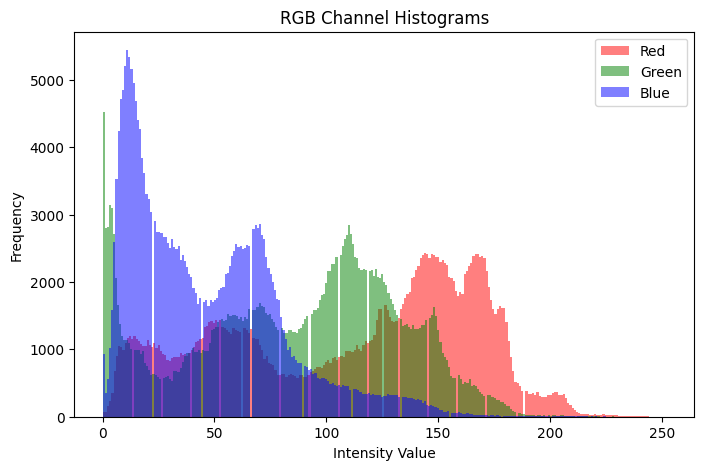

In [ ]:
# 3.1.2 RGB Channel Histograms
b, g, r = cv2.split(img)

plt.figure(figsize=(8, 5))
plt.hist(r.ravel(), bins=256, color='red', alpha=0.5, label='Red')
plt.hist(g.ravel(), bins=256, color='green', alpha=0.5, label='Green')
plt.hist(b.ravel(), bins=256, color='blue', alpha=0.5, label='Blue')
plt.title("RGB Channel Histograms")
plt.xlabel("Intensity Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

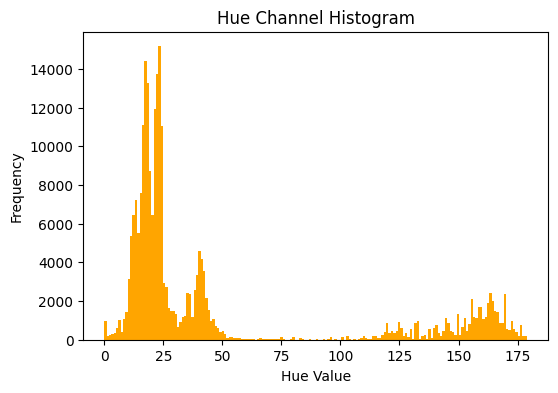

In [ ]:
# 3.1.3 Hue Histogram (HSV Color Space)
# The Hue channel shows color distribution independent of brightness.

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hue = hsv[:, :, 0]

plt.figure(figsize=(6, 4))
plt.hist(hue.ravel(), bins=180, color='orange')
plt.title("Hue Channel Histogram")
plt.xlabel("Hue Value")
plt.ylabel("Frequency")
plt.show()

## **3.2 Histogram Stretching (Contrast Stretching)**

Histogram stretching improves contrast by expanding intensity values to the full 0–255 range.

If an image has intensities only between 60–180, stretching maps:

* 60 → 0
* 180 → 255
* Everything in between scaled linearly

This increases dynamic range.

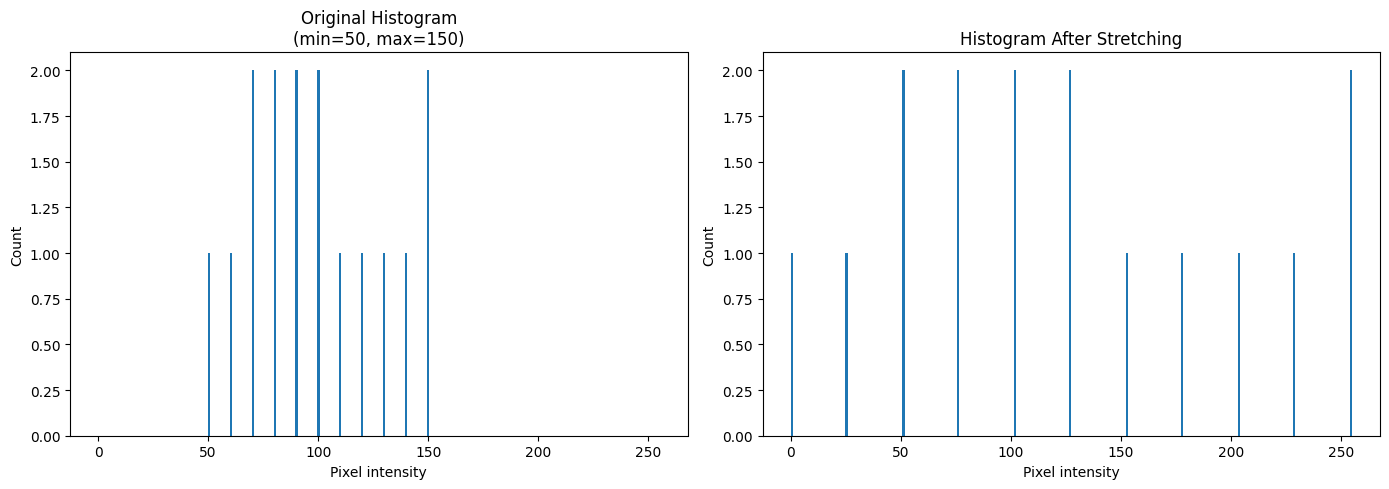

Original array:
 [[ 50  60  70  80]
 [ 90 100 110 120]
 [130 140 150 150]
 [100  90  80  70]]

Stretched array:
 [[  0  25  51  76]
 [102 127 153 178]
 [204 229 255 255]
 [127 102  76  51]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create a synthetic 2D "image" with limited intensity range
gray = np.array([
    [50, 60, 70, 80],
    [90, 100, 110, 120],
    [130, 140, 150, 150],
    [100, 90, 80, 70]
], dtype=np.uint8)

# Compute min and max intensity
min_val = np.min(gray)
max_val = np.max(gray)

# Min–max stretching
stretched = ((gray - min_val) / (max_val - min_val) * 255).astype('uint8')

# Plot histograms
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.hist(gray.ravel(), bins=256, range=(0,255))
plt.title(f"Original Histogram\n(min={min_val}, max={max_val})")
plt.xlabel("Pixel intensity")
plt.ylabel("Count")

plt.subplot(1,2,2)
plt.hist(stretched.ravel(), bins=256, range=(0,255))
plt.title("Histogram After Stretching")
plt.xlabel("Pixel intensity")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

print("Original array:\n", gray)
print("\nStretched array:\n", stretched)


## **3.3 Histogram Equalization**
Histogram equalization redistributes intensities to make the histogram more spread out.
Useful for low-contrast images.

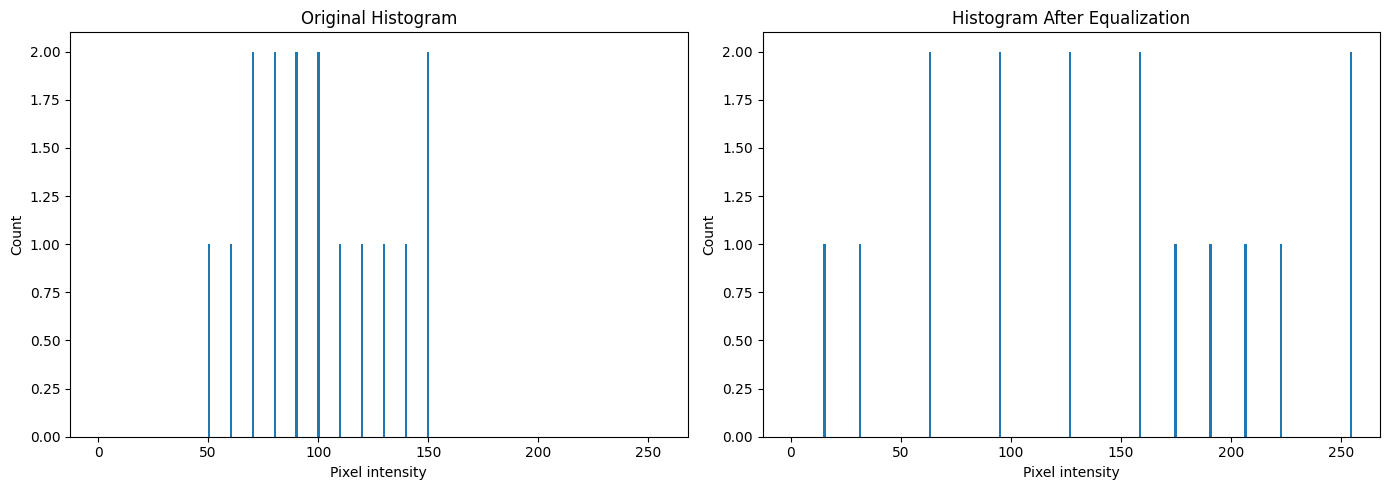

Original array:
 [[ 50  60  70  80]
 [ 90 100 110 120]
 [130 140 150 150]
 [100  90  80  70]]

Equalized array:
 [[ 15  31  63  95]
 [127 159 175 191]
 [207 223 255 255]
 [159 127  95  63]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Synthetic image
gray = np.array([
    [50, 60, 70, 80],
    [90, 100, 110, 120],
    [130, 140, 150, 150],
    [100, 90, 80, 70]
], dtype=np.uint8)

# 1. Compute histogram (256 bins for 0–255)
hist, bins = np.histogram(gray.flatten(), bins=256, range=(0,255))

# 2. Compute cumulative distribution function (CDF)
cdf = hist.cumsum()

# Normalize CDF to range [0,255]
cdf_norm = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
cdf_norm = cdf_norm.astype('uint8')

# 3. Map original intensities through the equalized CDF
equalized = cdf_norm[gray]

# Plot histograms
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.hist(gray.ravel(), bins=256, range=(0,255))
plt.title("Original Histogram")
plt.xlabel("Pixel intensity")
plt.ylabel("Count")

plt.subplot(1,2,2)
plt.hist(equalized.ravel(), bins=256, range=(0,255))
plt.title("Histogram After Equalization")
plt.xlabel("Pixel intensity")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

print("Original array:\n", gray)
print("\nEqualized array:\n", equalized)

## **3.4 CLAHE (Contrast Limited Adaptive Histogram Equalization)**

CLAHE performs histogram equalization in local regions, avoiding noise amplification.

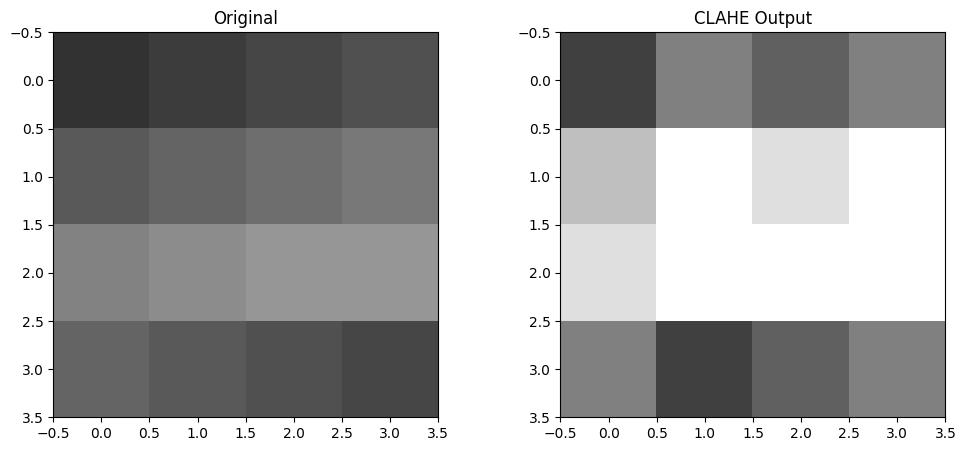

Original:
 [[ 50  60  70  80]
 [ 90 100 110 120]
 [130 140 150 150]
 [100  90  80  70]]

CLAHE result:
 [[ 64 128  96 128]
 [191 255 223 255]
 [223 255 255 255]
 [128  64  96 128]]


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Synthetic image
gray = np.array([
    [50, 60, 70, 80],
    [90, 100, 110, 120],
    [130, 140, 150, 150],
    [100, 90, 80, 70]
], dtype=np.uint8)

# Create CLAHE object
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(2,2))

# Apply CLAHE
clahe_img = clahe.apply(gray)

# Plot
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)
plt.title("Original")

plt.subplot(1,2,2)
plt.imshow(clahe_img, cmap='gray', vmin=0, vmax=255)
plt.title("CLAHE Output")

plt.show()

print("Original:\n", gray)
print("\nCLAHE result:\n", clahe_img)
